In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# import warnings
# warnings.filterwarnings('ignore')

# DecisionTree Classifier creation
dt_clf = DecisionTreeClassifier()
# iris data loading and train_test set split
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
# learning
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [3]:
from sklearn.tree import export_graphviz

# create tree.dot
export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

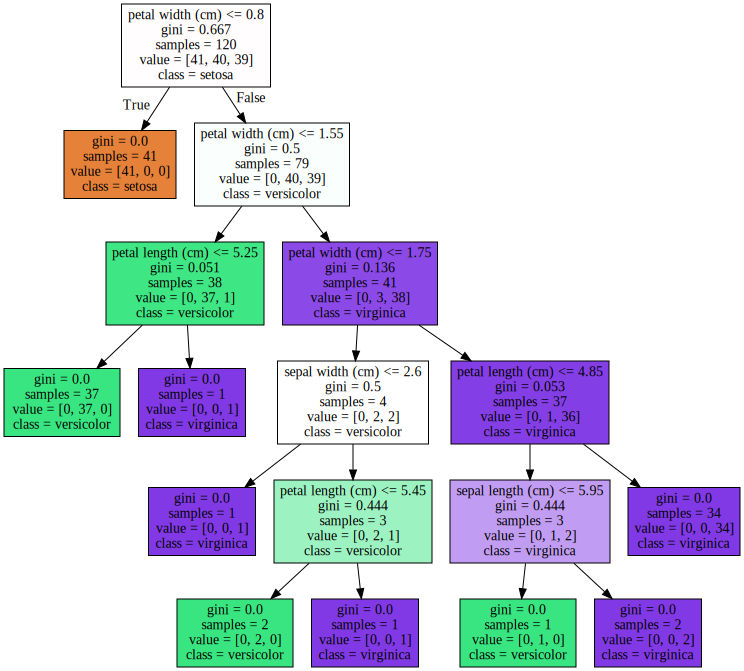

In [6]:
import graphviz
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

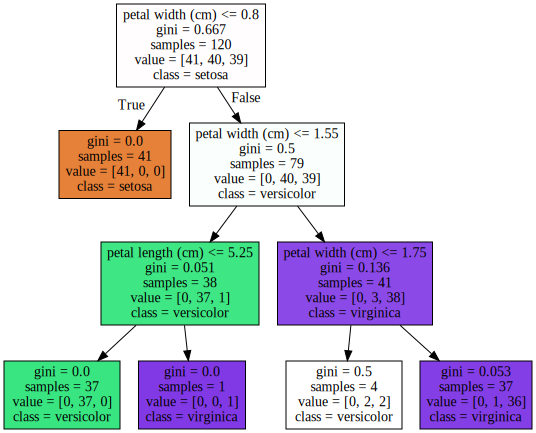

In [9]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

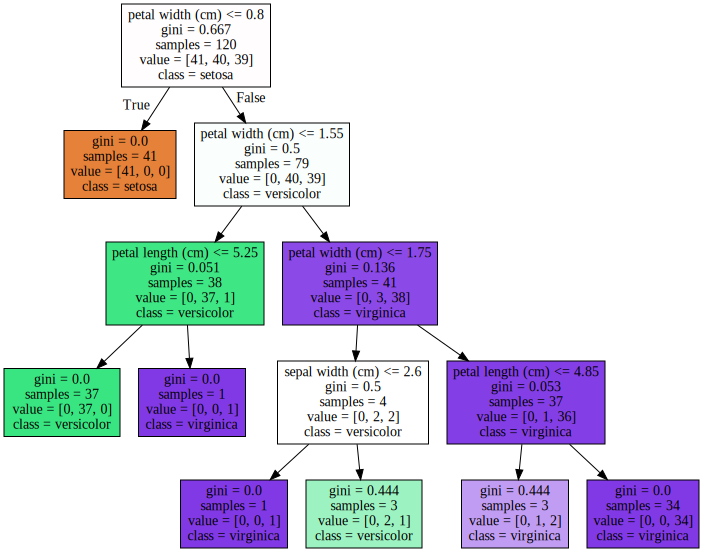

In [10]:
dt_clf = DecisionTreeClassifier(min_samples_split=4)
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

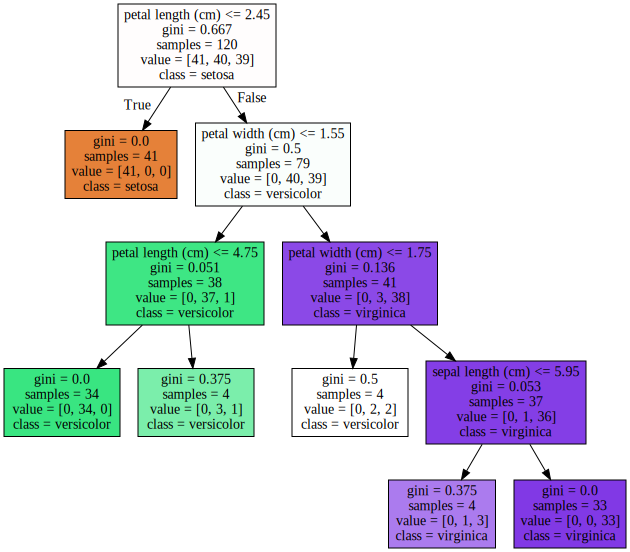

In [11]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=4)
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* Feature importance

feature importances:
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


<AxesSubplot:>

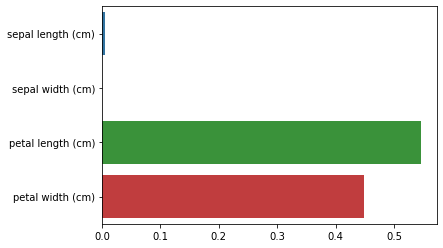

In [22]:
import seaborn as sns
import numpy as np
print('feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))
# importance mapping depnding on feature
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
# feature importance visualization
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### Decision tree and overfitting

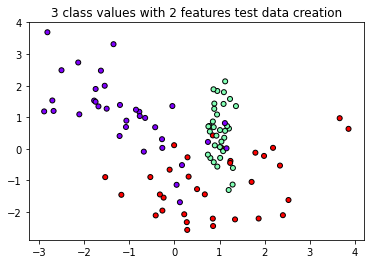

In [36]:
from sklearn.datasets import make_classification #this is for making test data sets for classification
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.title('3 class values with 2 features test data creation')
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [101]:
import numpy as np
# Classifier's decision boundary visualization
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    #learning data visualization using scatter plot
    ax.scatter(X[:,0], X[:,1], c=y, s=25, cmap='rainbow', edgecolor='k',
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    #learning
    model.fit(X,y)
    #prediction using coordinates created by meshgrid
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # contourf
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes+1)-0.5, 
                           cmap='rainbow', zorder=1)    

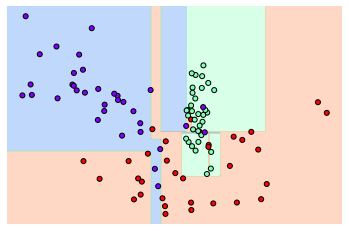

In [103]:
from sklearn.tree import DecisionTreeClassifier

# no hyperparameter limit
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

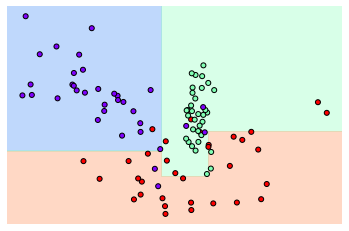

In [105]:
# limiting hyperparameter
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### Human activity recognition

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# features.txt file includes feature name index and feature names. Separated by space
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
            header=None, names=['column_index', 'column_name'])

# remove feature name index, make rest as list
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('10 feature names:', feature_name[:10])

10 feature names: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


* Duplicated feature name

In [119]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print('number of duplicated feature name:', feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

number of duplicated feature name: column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [122]:
feature_name_df.groupby('column_name').cumcount()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [151]:
# adding _1 or _2 to duplicated name
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index() #reset_index for merging
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    return new_feature_name_df    

In [134]:
a = feature_name_df.groupby('column_name').cumcount().reset_index()
b = feature_name_df.reset_index()

In [138]:
a.tail()

,index,0
556,556,0
557,557,0
558,558,0
559,559,0
560,560,0


In [139]:
b.tail()

,index,column_index,column_name
556,556,557,"angle(tBodyGyroMean,gravityMean)"
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,558,559,"angle(X,gravityMean)"
559,559,560,"angle(Y,gravityMean)"
560,560,561,"angle(Z,gravityMean)"


In [140]:
pd.merge(a,b,how='outer').tail()

,index,0,column_index,column_name
556,556,0,557,"angle(tBodyGyroMean,gravityMean)"
557,557,0,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,558,0,559,"angle(X,gravityMean)"
559,559,0,560,"angle(Y,gravityMean)"
560,560,0,561,"angle(Z,gravityMean)"


In [164]:
import pandas as pd

def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                header=None, names=['column_index', 'column_name'])
    # duplicated feature name update
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    # feature name list
    feature_name = new_feature_name_df['column_name'].values.tolist()
    # train test features loading
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    # train test target loading
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+', names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+', names=['action'])
    #return
    return X_train, X_test, y_train, y_test

X_train,X_test, y_train, y_test = get_human_dataset()    

In [166]:
print('# feature data set for training info')
print(X_train.info())

# feature data set for training info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [168]:
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   action  7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB
None


In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Decision Tree accuracy: {0:.4f}'.format(accuracy))
# DecisionTreeClassifier's hyperparameters
print('Hyperparameters:\n', dt_clf.get_params())

Decision Tree accuracy: 0.8548
Hyperparameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [172]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [178]:
# Hyperparameter sweep
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, params, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV best mean accuracy score:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV best hyperparameter:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   25.1s finished


GridSearchCV best mean accuracy score:0.8513
GridSearchCV best hyperparameter: {'max_depth': 16}


In [179]:
# Cross validation results
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.643632,0.074943,0.015542,0.004158,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,5
1,3.432833,0.068829,0.017146,0.002381,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,3
2,3.958231,0.077333,0.016344,0.006655,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,2
3,4.317486,0.259684,0.012835,0.000511,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,7
4,5.107689,0.332357,0.013035,0.000840,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1
5,4.976239,0.480190,0.013636,0.001467,20,{'max_depth': 20},0.802855,0.818491,0.856463,0.877551,0.898639,0.850800,0.035718,4
6,4.801326,0.494359,0.013333,0.003879,24,{'max_depth': 24},0.796057,0.818491,0.856463,0.877551,0.898639,0.849440,0.037597,6


In [180]:
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [181]:
#Using test dataset
max_depths = [6, 8, 10, 12, 16, 20, 24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Max depth:{0}, accuracy:{1:.4f}'.format(depth, accuracy))

Max depth:6, accuracy:0.8558
Max depth:8, accuracy:0.8707
Max depth:10, accuracy:0.8673
Max depth:12, accuracy:0.8646
Max depth:16, accuracy:0.8575
Max depth:20, accuracy:0.8548
Max depth:24, accuracy:0.8548


In [193]:
# multiple parameter sweep
params = {'max_depth':[8,12,16,20], 
          'min_samples_split':[16,24]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', n_jobs=-1, cv=5, verbose=2)
grid_cv.fit(X_train, y_train)
print('GridSearchCV best mean accuracy: %.4f' % grid_cv.best_score_)
print('GridSearchCV best parameter:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   23.0s finished


GridSearchCV best mean accuracy: 0.8549
GridSearchCV best parameter: {'max_depth': 8, 'min_samples_split': 16}


In [195]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('optimized decision tree accuracy: {0:.4f}'.format(accuracy))

optimized decision tree accuracy: 0.8717


In [201]:
# Important features plot
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
#sorting
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importance Top 20')
sns.barplot(x=ftr_to)

# sns.barplot(x=ftr_importances_values, )

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
fBodyGyro-maxInds-X                0.023971
tGravityAcc-energy()-Y             0.020470
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAccMag-arCoeff()1          0.015741
tBodyAcc-correlation()-X,Y         0.009972
fBodyAcc-max()-Y                   0.008825
tBodyGyro-max()-X                  0.008550
tGravityAcc-max()-Y                0.006290
fBodyGyro-max()-X                  0.005247
tBodyGyro-min()-X                  0.004373
tBodyAccJerk-correlation()-X,Y     0.003967
tBodyGyroJerk-max()-X              0.003471
tGravityAcc-arCoeff()-Y,3          0.003025
angle(Z,gravityMean)               0.002987
tGravityAcc-min()-Z                0.002912
dtype: float64

In [199]:
pd.Series.sort_values?

Signature:
pd.Series.sort_values(
    self,
    axis=0,
    ascending=True,
    inplace: bool = False,
    kind: str = 'quicksort',
    na_position: str = 'last',
    ignore_index: bool = False,
    key: Union[Callable[[ForwardRef('Series')], Union[ForwardRef('Series'), ~AnyArrayLike]], NoneType] = None,
)
Docstring:
Sort by the values.

Sort a Series in ascending or descending order by some
criterion.

Parameters
----------
axis : {0 or 'index'}, default 0
    Axis to direct sorting. The value 'index' is accepted for
    compatibility with DataFrame.sort_values.
ascending : bool, default True
    If True, sort values in ascending order, otherwise descending.
inplace : bool, default False
    If True, perform operation in-place.
kind : {'quicksort', 'mergesort' or 'heapsort'}, default 'quicksort'
    Choice of sorting algorithm. See also :func:`numpy.sort` for more
    information. 'mergesort' is the only stable  algorithm.
na_position : {'first' or 'last'}, default 'last'
    Argument